In [1]:
import fly_plot_lib.plot as fpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import figurefirst as fifi
# from statsmodels.stats import proportions_ztest

2.2.4
recommended version: 1.1.1 or greater


In [ ]:
def slice_means(df, index):
    time_vec=[]
    mean_vec=[]
    upper_vec =[]
    lower_vec =[]
    for i in df['time stamp'].unique():
        if i >-200 and i <5000:
            dummy_df =df[df['time stamp']==i]
            #helps remove edge errors with calibration not working near walls as accurately
            dummy_df=dummy_df[dummy_df['x'].between(-.5, .5)]
            dummy_df=dummy_df[dummy_df['y'].between(-.25, .25)]
            time_vec.append(i)
            mean = dummy_df[index].mean()
            upper= dummy_df[index].mean() + dummy_df[index].sem()*1.96
            lower= dummy_df[index].mean() - dummy_df[index].sem()*1.96
            mean_vec.append(mean)
            upper_vec.append(upper)
            lower_vec.append(lower)
    return time_vec, mean_vec, upper_vec, lower_vec

# Function that sets the origin of a trajectory to the end point of the optogenetic pulse or in the case of shams simply 675ms after the triggering event

In [4]:
def establish_end_as_origin(df, end_time =680, id_key = 'obj_id_unique'):
    df_catcher= []
    for i in df[id_key].unique():
        d_ =df[df['obj_id_unique']==i]
        d_=d_[d_['time stamp'].between(-200, 5000)]
        if d_['time stamp'].max()>1680:
            try:
                ind = np.where(d_['time stamp']==680)[0][0]
                ind0 =np.where(d_['time stamp']==0)[0][0]

                x_ref =d_['x'].iloc[ind]
                y_ref = d_['y'].iloc[ind]
                d_['norm x']=d_['x']-x_ref
                d_['norm y']=d_['y']-y_ref
                df_catcher.append(d_)
            except:
                pass
    df_fin= pd.concat(df_catcher)
    return df_fin

# Load in wild-type control data


In [2]:
#Still air data sets
dfnw_wt =pd.read_csv('../trimmed_data/main/wildtype_still_air_merged.csv')
dfn_wt0=dfnw_wt[dfnw_wt['duration']==0]
dfn_wt100=dfnw_wt[dfnw_wt['duration']==100]
#Laminar wind data sets
dfl_wt=pd.read_csv('../trimmed_data/main/wild_type_laminar_merged.csv')
dfl_wt100 = dfl_wt[dfl_wt['duration']==100]
dfl_wt0 = dfl_wt[dfl_wt['duration']==0]

# Apply origin centering to the data sets

In [5]:
dfn_wt100 = establish_end_as_origin(dfn_wt100)
dfl_wt100 = establish_end_as_origin(dfl_wt100)

dfn_wt0 = establish_end_as_origin(dfn_wt0)
dfl_wt0 = establish_end_as_origin(dfl_wt0)

In [7]:
dfn_wt100['distance from center']=(dfn_wt100['norm x']**2 +dfn_wt100['norm y']**2)**0.5
dfl_wt100['distance from center']=(dfl_wt100['norm x']**2 +dfl_wt100['norm y']**2)**0.5

dfn_wt0['distance from center']=(dfn_wt0['norm x']**2 +dfn_wt0['norm y']**2)**0.5
dfl_wt0['distance from center']=(dfl_wt0['norm x']**2 +dfl_wt0['norm y']**2)**0.5

Wild Type No Wind Flash n= 252
Wild Type No Wind Sham n= 235
Wild Type Laminar Wind Flash n= 404
Wild Type Laminar Wind Sham n= 429


# FiFi setup

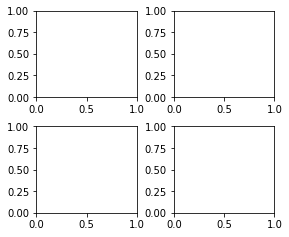

In [6]:
template ='../figure_first_templates/s7.svg'
layout =fifi.svg_to_axes.FigureLayout(template, autogenlayers=True, make_mplfigures=True, hide_layers=[])
fs=6
lw=1

In [35]:
#Laminar wind wild type vs no wind wild type which recieved flashes
ax=layout.axes[('wt', 'lwnwf')]

In [36]:
d0_time, d0_mean, d0_upper, d0_lower = slice_means(dfn_wt100, 'distance from center')
d50_time, d50_mean, d50_upper, d50_lower = slice_means(dfl_wt100, 'distance from center')

In [37]:
ax.plot(d50_time, d50_mean, color = 'red',linestyle='-', linewidth =lw, label ="Laminar Wind")

ax.plot(d0_time, d0_mean, color ='red', linestyle = '--', linewidth = lw, label ="No Wind")

ax.fill_between(d50_time, d50_upper, d50_lower, color = 'red', alpha = 0.1, lw =0)

ax.fill_between(d0_time, d0_upper, d0_lower, color = 'red', alpha = 0.1, lw = 0)
#ax.legend(loc = 'upper right', fontsize = 6)

ax.axvspan(0, 675, color = 'red', alpha = 0.1)
#ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Horizontal Distance from\n End Position (m)")
ax.set_title("Flashes")
#ax.set_xticks([0, 500, 1000, 1500, 2000])
ax.set_xlim(-100, 3000)
ax.set_ylim(0, .3)

fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], yticks=[0, .3], xticks=[0, 675, 3000], tick_length=3, linewidth=.75)
fifi.mpl_functions.set_fontsize(ax, fs)

In [38]:
#Laminar wind wild type vs no wind wild type which recieved shams
ax=layout.axes[('wt', 'lwnws')]

In [39]:
d0_time, d0_mean, d0_upper, d0_lower = slice_means(dfn_wt0, 'distance from center')
d50_time, d50_mean, d50_upper, d50_lower = slice_means(dfl_wt0, 'distance from center')

In [40]:
ax.plot(d50_time, d50_mean, color = 'k',linestyle='-', linewidth =lw, label ="Laminar Wind")

ax.plot(d0_time, d0_mean, color ='k', linestyle = '--', linewidth = lw, label ="No Wind")

ax.fill_between(d50_time, d50_upper, d50_lower, color = 'k', alpha = 0.1, lw =0)

ax.fill_between(d0_time, d0_upper, d0_lower, color = 'k', alpha = 0.1, lw = 0)
#ax.legend(loc = 'upper right', fontsize = 6)

ax.axvspan(0, 675, color = 'k', alpha = 0.1)
#ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Horizontal Distance from\n End Position (m)")
ax.set_title("Flashes")
#ax.set_xticks([0, 500, 1000, 1500, 2000])
ax.set_xlim(-100, 3000)
ax.set_ylim(0, .3)

fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], yticks=[0, .3], xticks=[0, 675, 3000], tick_length=3, linewidth=.75)
fifi.mpl_functions.set_fontsize(ax, fs)

In [41]:
#Laminar wind flash plotted against sham i.e. no visually mediated artifact
ax=layout.axes[('wt', 'lw')]

In [42]:
d0_time, d0_mean, d0_upper, d0_lower = slice_means(dfl_wt100, 'distance from center')
d50_time, d50_mean, d50_upper, d50_lower = slice_means(dfl_wt0, 'distance from center')

In [43]:
ax.plot(d50_time, d50_mean, color = 'k',linestyle='-', linewidth =lw, label ="Laminar Wind")

ax.plot(d0_time, d0_mean, color ='red', linestyle = '-', linewidth = lw, label ="No Wind")

ax.fill_between(d50_time, d50_upper, d50_lower, color = 'k', alpha = 0.1, lw =0)

ax.fill_between(d0_time, d0_upper, d0_lower, color = 'red', alpha = 0.1, lw = 0)
#ax.legend(loc = 'upper right', fontsize = 6)

ax.axvspan(0, 675, color = 'red', alpha = 0.1)
#ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Horizontal Distance from\n End Position (m)")
ax.set_title("Flashes")
#ax.set_xticks([0, 500, 1000, 1500, 2000])
ax.set_xlim(-100, 3000)
ax.set_ylim(0, .3)

fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], yticks=[0, .3], xticks=[0, 675, 3000], tick_length=3, linewidth=.75)
fifi.mpl_functions.set_fontsize(ax, fs)

In [44]:
#No wind flash plotted against sham i.e. no visually mediated artifact
ax=layout.axes[('wt', 'nw')]

In [45]:
d0_time, d0_mean, d0_upper, d0_lower = slice_means(dfn_wt100, 'distance from center')
d50_time, d50_mean, d50_upper, d50_lower = slice_means(dfn_wt0, 'distance from center')

In [46]:
ax.plot(d50_time, d50_mean, color = 'k',linestyle='--', linewidth =lw, label ="Laminar Wind")

ax.plot(d0_time, d0_mean, color ='red', linestyle = '--', linewidth = lw, label ="No Wind")

ax.fill_between(d50_time, d50_upper, d50_lower, color = 'k', alpha = 0.1, lw =0)

ax.fill_between(d0_time, d0_upper, d0_lower, color = 'red', alpha = 0.1, lw = 0)
#ax.legend(loc = 'upper right', fontsize = 6)

ax.axvspan(0, 675, color = 'red', alpha = 0.1)
#ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Horizontal Distance from\n End Position (m)")
ax.set_title("Flashes")
#ax.set_xticks([0, 500, 1000, 1500, 2000])
ax.set_xlim(-100, 3000)
ax.set_ylim(0, .3)

fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], yticks=[0, .3], xticks=[0, 675, 3000], tick_length=3, linewidth=.75)
fifi.mpl_functions.set_fontsize(ax, fs)

In [47]:
layout.append_figure_to_layer(layout.figures['wt'], 'wt', cleartarget=True)
layout.write_svg(template)